In [406]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import plotly.express as px

In [407]:
processed_dir = Path("/mnt/20tb/vsfishman/GEO/processed/homo/")
meta_dir = Path("/mnt/20tb/vsfishman/GEO/metadata/homo/")

In [408]:
metadata = {"experiment":[],"sample":[]}
fpkms = []
rows_check = None

experiments = [d for d in os.listdir(processed_dir) if d.startswith("GSE")]
for e in tqdm(experiments):
    samples = [s[:-6] for s in os.listdir(processed_dir / e) if s.endswith("_quant")]
    for s in samples:
        fpkm = processed_dir / Path(e) / Path(s + "_quant") / "gene_fpkm.tsv"
        if not os.path.exists(fpkm):
            continue
        fpkm = pd.read_csv(fpkm, sep="\t",
                           dtype={"Gene stable ID":str,s:np.float32}
                          )
        if rows_check is not None:
            assert np.array_equal(fpkm.index.values,rows_check)
        else:
            rows_check = fpkm.index.values
        fpkms.append(fpkm[s].values)
        metadata["experiment"].append(e)
        metadata["sample"].append(s)

  0%|          | 0/482 [00:00<?, ?it/s]

In [409]:
fpkms = np.vstack(fpkms)
fpkms.shape # (1511, 62646) # (1888, 62646) #(2782, 62646)

(2782, 62646)

In [410]:
fpkms

array([[ 0.1923139 ,  0.        ,  4.765303  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.47943676,  0.        , 12.349577  , ...,  7.241332  ,
         0.        ,  0.        ],
       [ 0.47968614,  0.        ,  7.692227  , ...,  0.9243442 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 22.665995  , ...,  1.2126129 ,
         0.        , 35.961174  ],
       [22.89225   ,  0.19397515, 43.212124  , ...,  1.4574385 ,
         0.        ,  6.6175237 ],
       [22.380606  ,  1.4155747 , 42.677834  , ...,  2.0216165 ,
         0.        ,  7.324978  ]], dtype=float32)

In [411]:
meta = pd.DataFrame(metadata)
gb = meta.groupby("experiment")
_ = []
for experiment in gb.groups:
    # print (experiment)
    experiment_dir = meta_dir / experiment
    experiment_df = pd.read_csv(experiment_dir / (experiment + "_PEP/" + experiment + "_PEP_raw.csv"))
    merge = experiment_df.merge(gb.get_group(experiment),left_on=["sample_title"],
                           right_on=["sample"],
                           validate="1:1")
          
    _.append(merge)

In [412]:
metadata_full = pd.concat(_)

In [413]:
valid_columns = ['experiment','sample_title', 'cell_type', 'tissue', 'treatment',
                 'genotype','tumor_type', 'cell_line', 'lineage', 'protocol', 'organism', 'read_type', 'data_source',
        'sex', 'sample_type', 'sample_description', 'sample_library_selection', 'tissue_type',
       'sample_library_source', 'sample_library_strategy', 
       'ssuvr_treatment', 'genome_build', 'sample', 'individual',
       'stimulation', 'cell_subset', 'collection_method',
       'disease_status', 'infection', 'modification',
       'biological_replicate', 'sampleid', 'lane', 'batch_rnaseq',
       'donor', 'car', 'antigen', 'time', 'condition',
       'hutchbasesamplename', 'genotype_variation',
       'location', 'culture_condition',
       'passages', 'cell_status', 'passage', 'smacra4_status',
       'sample_growth_protocol_ch1', 'chip_antibody', 'quality_control',
       'chip-seq_alignment', 'chip-seq_peak_calling', 'rna-seq_trimming',
       'rna-seq_mapping_and_alignment', 'scrna-seq', 'foxa1_genotype',
       'crispr_genotype', 'replicate', 'sample_extract_protocol_ch1',
       'sample_data_processing', 'experiment_x', 'batch', 'experiment_y',
       'guide_rna', 'gfp', 'processed_data_file', 'cell_markers',
       'disease', 'hdaci_group', 'bmi_classification', 'subject_status',
       'gender', 'age', 'tumor_stage', 'read_1', 'read_counting',
       'cellular_source', 'status', 'disease_state',
       'sample_supplementary_file_3', 'vzv_infection',
       'gestational_age_at_birth', 'line_source', 'subtype', 'donor_sex',
       'donor_age', 'statuts', 'index_sort_annotation', 'passed_cell_qc',
       'sorted_population', 'assembly', 'sample_contact_web_link',
       'sample_supplementary_file_4', 'sample_supplementary_file_5',
       'drug', 'drug_sensitivity', 'processed_data_file_build',
       'processed_data_file_type', 'library_strategy', 'plasmid',
       'base_caller', 'vector', 'passage_', 'hours_post_infection',
       'source', 'marker', 'hesc_line', 'co-culture_conditions',
       'rna_type', 'reanalyzed_by', 'donor_type',
       'fastq_quality_trimming', 'mertk_haplotype', 'antibody',
       'bulk_or_single_cell', 'treated_with', 'bar_code', 'alignment',
       'rin', 'transfection', 'age_group', 'supportive_ability',
       'cell_isolate_number', 'chip-seq', 'hypotrophy', 'relation',
       'cell_line_background', 'infected_with',
       'subject_status_id', 'hour', 'commercial_name', 'shrna',
       'timepoint', 'cell-subtype', 'day3-5_treatment',
       'differentiation_day']

In [414]:
fpkms.shape

(2782, 62646)

In [415]:
np.savetxt("fpkms.txt",fpkms)

In [416]:
!ls -lh fpkms.txt #2.8G #4.1G

-rw-rw-r-- 1 vsfishman vsfishman 4.1G Jun 30 09:01 fpkms.txt


In [417]:
metadata_full.shape

(2782, 480)

In [418]:
metadata_full.to_csv("fpkms.metadata.csv")

In [419]:
metadata_full["cell_type"].value_counts()

CD8 T cells                           63
primary bronchial epithelial cells    38
immortalized human keratinocytes      16
CD4+ T cells                          15
hNaive PSC derived hFS cells          15
                                      ..
Gamma_delta_T                          1
Naive_B                                1
oligodendroglioma cells                1
PAEC                                   1
Human embryonic stem cells (H9)        1
Name: cell_type, Length: 255, dtype: int64

In [420]:
metadata_full["tissue"].value_counts().sum()

429

In [421]:
metadata_full["sample_description"].value_counts()

RNA_gene_abundance.txt.gz                           22
mRNA                                                15
cntCAF.csv                                          15
human skin primary migratory LCs                    13
single cell transcriptomic                          13
                                                    ..
RX197, Single-cell RNA-Seq                           1
RX213, Single-cell RNA-Seq                           1
RX216, Single-cell RNA-Seq                           1
RX217, Single-cell RNA-Seq                           1
50nM of digoxin for 48h – Biological Replicate 3     1
Name: sample_description, Length: 704, dtype: int64

In [422]:
r = {}
for c in metadata_full.columns:
    nonnans = ~pd.isna(metadata_full[c])
    count_not_nan = nonnans.sum()
    if count_not_nan == 0:
        example = None
    else:
        example = metadata_full[nonnans][c].values[0]
    r[c] = [count_not_nan, example]
r

{'sample_name': [2782, 'ctrl_rnai_rnaseq_rep1'],
 'protocol': [2782, 'cDNA'],
 'organism': [2782, 'Homo sapiens'],
 'read_type': [2782, 'PAIRED'],
 'data_source': [2782, 'SRA'],
 'srr': [2782, 'SRR5765589'],
 'srx': [2782, 'SRX2965215'],
 'sample_title': [2782, 'Ctrl_RNAi.RNAseq.rep1'],
 'sample_geo_accession': [2782, 'GSM2688927'],
 'sample_status': [2782, 'Public on Jun 01 2020'],
 'sample_submission_date': [2782, 'Jun 28 2017'],
 'sample_last_update_date': [2782, 'Jun 01 2020'],
 'sample_type': [2782, 'SRA'],
 'sample_channel_count': [2782, 1],
 'sample_source_name_ch1': [2746, 'HEK293T'],
 'sample_organism_ch1': [2782, 'Homo sapiens'],
 'sample_taxid_ch1': [2782, 9606],
 'sample_molecule_ch1': [2782, 'total RNA'],
 'sample_platform_id': [2782, 'GPL11154'],
 'sample_contact_name': [2782, 'Yuanxin,,Xi'],
 'sample_contact_email': [1750, 'xiyuanxin@yahoo.com'],
 'sample_contact_phone': [519, '530-220-2067'],
 'sample_contact_department': [1960,
  'Bioinformatics and Computational Biolo

In [423]:
metadata_full["sample_source_name_ch1"].value_counts()

Cardiac fibroblasts                                714
Cryopreserved PBMC                                  60
HeLa                                                59
primary bronchial epithelial cells                  38
Peripheral Blood CD8+ T Cells                       24
                                                  ... 
human H1 ESC line, then differentiated in vitro      1
ESCs                                                 1
MDA231 Brain Xenograft                               1
HMC1.2_DMSO                                          1
m0_AL                                                1
Name: sample_source_name_ch1, Length: 686, dtype: int64

In [424]:
_ =  {'sample_source_name_ch1': [1488, 'HaCaT cells'],
 'cell_type': [365, 'immortalized human keratinocytes'],
 'cell_subset': [60, 'CD3+CD8+ T cells'],
 'tissue': [107, 'V16A cells'],
 'tumor_type': [6, 'Prostate cancer'],
 'sample_characteristics_ch1': [797, 'tissue: Heart'],
 'cell_line': [284, 'MDAMB231'],
 'cell_status': [10, 'hESC'],
 'cell_markers': [9, 'CD4+, CD7-'],
 'cellular_source': [10, 'PBMCs'],
 'source': [3, 'circulating immune cells'],
 'marker': [1, 'CD4- CD8- CD56/CD16- CD19+'],
 'hesc_line': [4, 'HUES8'],
 'cell_line_background': [9, 'A549'],
 'cell-subtype': [9, 'astrocytoma']}
cell_type_cols = _.keys()
cell_type_cols

dict_keys(['sample_source_name_ch1', 'cell_type', 'cell_subset', 'tissue', 'tumor_type', 'sample_characteristics_ch1', 'cell_line', 'cell_status', 'cell_markers', 'cellular_source', 'source', 'marker', 'hesc_line', 'cell_line_background', 'cell-subtype'])

In [425]:
metadata_full["full_cell_type_description"] = metadata_full.apply(lambda x: "/".join(map(str,[i for i in x[cell_type_cols] if not pd.isna(i)])), axis="columns")

In [547]:
# remove multiple duplicated samples from "GSE106888"
ct_filter = (metadata_full["experiment"] != "GSE106888").values
# but keep first experiment
ct_filter[np.nonzero(~ct_filter)[0][0]] = True 
# ct_filter = np.array([True]*len(metadata_full))
ct_filter.sum()

2081

In [548]:
fpkms.shape #cell type - gene_id

(2782, 62646)

In [549]:
fpkm.max()

WT_D686D    146657.828125
dtype: float32

In [620]:
fpkms_tranformed = np.nan_to_num(fpkms[ct_filter], 0)

In [621]:
# Option A - transform using rankeddata
# from scipy.stats import rankdata
# fpkms_tranformed = rankdata(fpkms_tranformed, method='min', axis = 1)

# Option B - transform using clip and log2

fpkms_tranformed = fpkms_tranformed.clip(0,np.percentile(fpkms_tranformed,99.9))
# fpkms_tranformed[fpkms_tranformed == 0] = fpkms_tranformed[fpkms_tranformed != 0].min() / 2
fpkms_tranformed = fpkms_tranformed / (np.mean(fpkms_tranformed, axis=0) + 0.1)
fpkms_tranformed = np.log2(fpkms_tranformed + 0.1)

min_expression_thr = 37987.0
(2081, 37584)


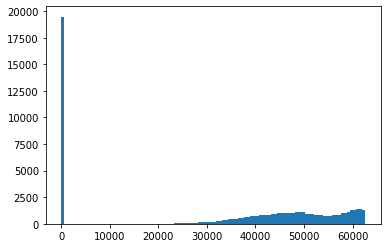

In [482]:
# remove genes with low total_count
s1 = np.percentile(fpkms_tranformed, 90, axis = 0) # s1 contains max gene expression  
                                        # over all cell_types
# plt.hist(s1.clip(0,np.percentile(s1,50)), bins = 100)
plt.hist(s1, bins = 100)
min_percentile_thr = 40
min_expression_thr = np.percentile(s1,min_percentile_thr)
print (f"min_expression_thr = {min_expression_thr}")
fpkms_tranformed = fpkms_tranformed[:,s1>min_expression_thr]
print (fpkms_tranformed.shape)

In [483]:
np.mean(fpkms_tranformed, axis = 0).min()

4871.057664584335

(array([18652.,     0.,     0.,     0.,     0.,     0.,   369.,  6068.,
         6246.,  6249.]),
 array([1.00000e+00, 6.26550e+03, 1.25300e+04, 1.87945e+04, 2.50590e+04,
        3.13235e+04, 3.75880e+04, 4.38525e+04, 5.01170e+04, 5.63815e+04,
        6.26460e+04]),
 <BarContainer object of 10 artists>)

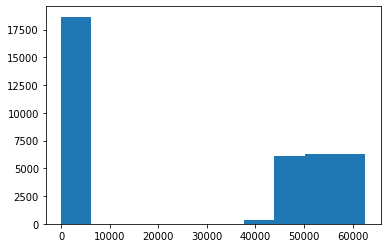

In [484]:
plt.hist(fpkms_tranformed[487])

In [485]:
(np.std(fpkms_tranformed, axis = 0) / np.mean(fpkms_tranformed, axis = 0)).min()

0.1441238702864006

In [487]:
std = np.std(fpkms_tranformed, axis = 0) # / np.mean(fpkms_tranformed, axis = 0)
# plt.hist(std, bins = 100)
min_std_percentile_thr = 60
min_std_thr = np.percentile(std,min_std_percentile_thr)
print (f"min_std_thr = {min_std_thr}")
max_std_percentile_thr = 98
max_std_thr = np.percentile(std,max_std_percentile_thr)

fpkms_tranformed = fpkms_tranformed[:,np.logical_and(std>min_std_thr,std<max_std_thr)]
print (fpkms_tranformed.shape)

min_std_thr = 19775.37704649767
(2081, 14282)


In [488]:
# from sklearn.preprocessing import MinMaxScaler 
# scaler = MinMaxScaler()
# fpkms_tranformed = scaler.fit_transform(fpkms_tranformed.T).T

In [489]:
fpkms_tranformed.max(), fpkms_tranformed.min()

(62646, 1)

In [629]:
# tranform = PCA(n_components=2)
tranform = umap.UMAP()
principal_components = tranform.fit_transform(fpkms_tranformed)
principal_components.shape

(2081, 2)

In [630]:
def find_keywords(x,kw):
    for i in kw:
        if x.lower().find(i.lower()) != -1:
            return True
    return False

kws = ["breast","mcf","mamma","22rv"]

colors = metadata_full["full_cell_type_description"][ct_filter].apply(find_keywords, kw = kws)

plot_metadata = pd.DataFrame({"PC1":principal_components[:,0],
                              "PC2":principal_components[:,1],
                              "full_cell_type_description":metadata_full["full_cell_type_description"][ct_filter],
                              "experiment":metadata_full["experiment"][ct_filter],
                              "breast":colors.values
                             }
                            )
plot_metadata["size"] = plot_metadata["breast"]*5 + 1

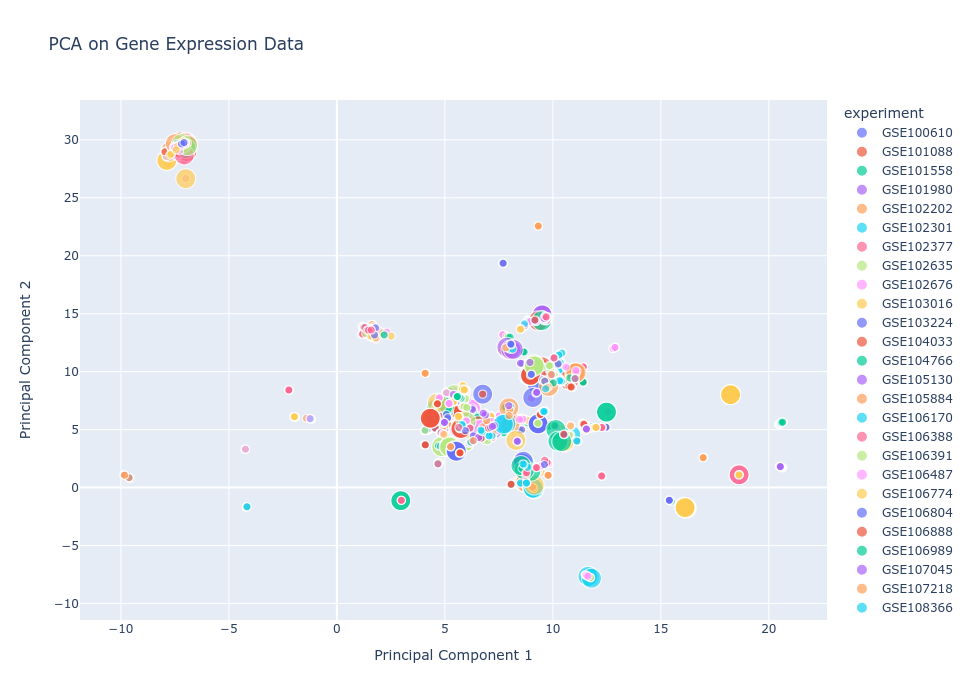

In [631]:
fig = px.scatter(plot_metadata, x='PC1', y='PC2',
                 title='PCA on Gene Expression Data',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 color='experiment', size=plot_metadata["size"] / 2, hover_data=['experiment', 'full_cell_type_description'], width=900, height=700)
fig.show()

In [632]:
HEKs = plot_metadata.full_cell_type_description.apply(lambda x: x.find("HEK") != -1)
HEK_gse = ["GSE142075","GSE136326"]
HEKs = plot_metadata.experiment.apply(lambda x: x in HEK_gse)
plot_metadata["isHEK"] = False
plot_metadata["isHEK"][HEKs] = True
plot_metadata["size"] = plot_metadata["isHEK"]*5 + 1

/home/vsfishman/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [633]:
plot_metadata["isHEK"].sum()

13

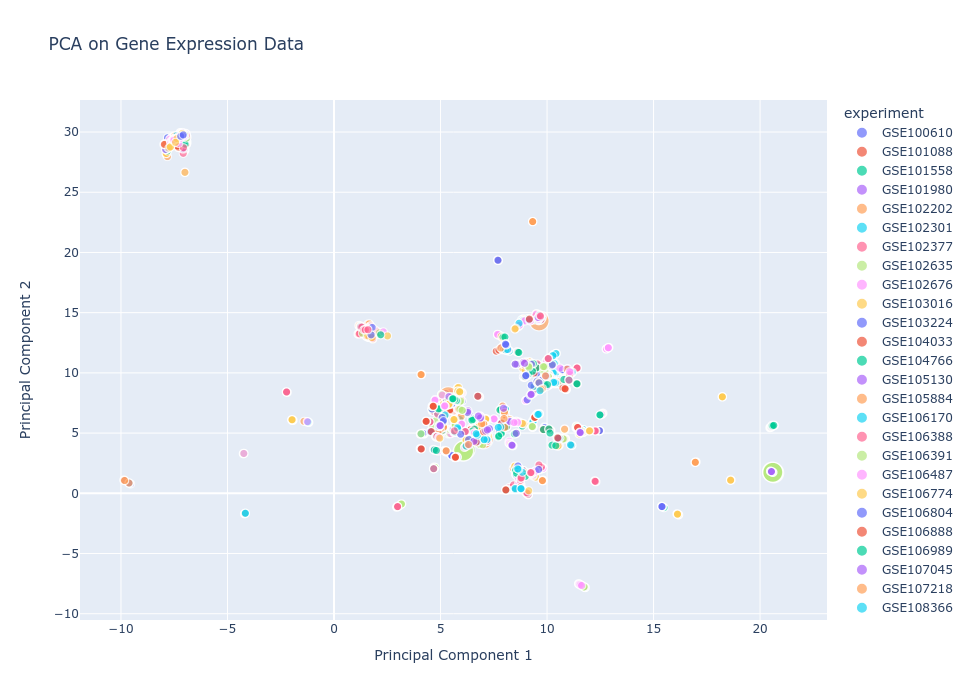

In [634]:
fig = px.scatter(plot_metadata, x='PC1', y='PC2',
                 title='PCA on Gene Expression Data',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 color='experiment', size=plot_metadata["size"] / 2, hover_data=['experiment', 'full_cell_type_description'], width=900, height=700)
fig.show()

In [509]:
HEK_gse = ["GSE142075","GSE136326"]

In [526]:
ids = plot_metadata.reset_index()[plot_metadata.reset_index().experiment == "GSE136326"].index.to_list()
ids += plot_metadata.reset_index()[plot_metadata.reset_index().experiment == "GSE142075"].index.to_list()
ids

[850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 960, 961, 962]

In [573]:
ids2 = plot_metadata.reset_index()[plot_metadata.reset_index().experiment == "GSE141945"].index.to_list()
ids2

[944, 945, 946, 947, 948, 949, 950, 951, 952, 953]

In [532]:
fpkms_unprocessed = np.nan_to_num(fpkms[ct_filter], 0)

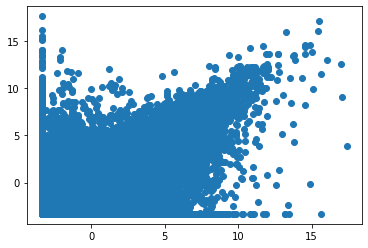

In [576]:
subsample = 1
pseudocount = 0.1
X = np.log2(fpkms_unprocessed[ids[0]][::subsample] + pseudocount)
Y = np.log2(fpkms_unprocessed[ids[-1]][::subsample] + pseudocount)
plt.scatter(X,Y)
# plt.xlim(0,np.log2(2000))
# plt.ylim(0,np.log2(2000))

In [577]:
from scipy.stats import spearmanr
for thr in range(10):
    print (thr, spearmanr(X[np.logical_and(X>thr,Y>thr)],
                          Y[np.logical_and(X>thr,Y>thr)]
                         )
          )

0 SpearmanrResult(correlation=0.6136151518259928, pvalue=0.0)
1 SpearmanrResult(correlation=0.5867042259589879, pvalue=0.0)
2 SpearmanrResult(correlation=0.5739015470235671, pvalue=0.0)
3 SpearmanrResult(correlation=0.550812576583777, pvalue=0.0)
4 SpearmanrResult(correlation=0.5508915758410079, pvalue=1.93602404452637e-295)
5 SpearmanrResult(correlation=0.5579517916421854, pvalue=9.085667151223272e-180)
6 SpearmanrResult(correlation=0.5959455052582738, pvalue=1.187959755253462e-114)
7 SpearmanrResult(correlation=0.59482948512162, pvalue=5.606808942496032e-61)
8 SpearmanrResult(correlation=0.5890965340045095, pvalue=9.529843248543348e-32)
9 SpearmanrResult(correlation=0.56471135060031, pvalue=1.0138162879920728e-16)


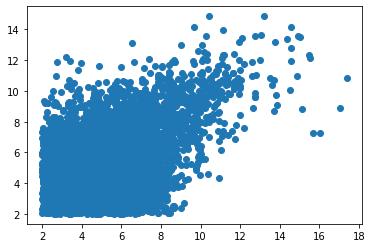

In [569]:
thr = 2
plt.scatter(X[np.logical_and(X>thr,Y>thr)],
                          Y[np.logical_and(X>thr,Y>thr)]
                         )

In [601]:
HEK1_fpkm = pd.read_csv("/mnt/20tb/vsfishman/GEO/processed/homo/GSE136326/pCDH-vector-OE-rep1_quant/gene_fpkm.tsv",
                       sep="\t")["pCDH-vector-OE-rep1"].values
HEK2_fpkm = pd.read_csv("/mnt/20tb/vsfishman/GEO/processed/homo/GSE142075/shCtrl+PDS-1_quant/gene_fpkm.tsv",
                        sep="\t")["shCtrl+PDS-1"].values
GBO_fpkm = pd.read_csv("/mnt/20tb/vsfishman/GEO/processed/homo/GSE141945/7790_12wk_quant/gene_fpkm.tsv",
                        sep="\t")["7790_12wk"].values

In [602]:
gene_means = np.nan_to_num(fpkms,0).mean(axis = 0) + 0.001
HEK1_fpkm = HEK1_fpkm / gene_means
HEK2_fpkm = HEK2_fpkm / gene_means
GBO_fpkm = GBO_fpkm / gene_means

In [604]:
np.isnan(HEK1_fpkm).sum()

0

-3.321928094887362 9.224768784082876 62646 SpearmanrResult(correlation=0.5242626362650636, pvalue=0.0)
-2 -1 4072 SpearmanrResult(correlation=0.07270392462132715, pvalue=3.4152663524454953e-06)
-1 0 6174 SpearmanrResult(correlation=0.07623781933932847, pvalue=1.9989902890355676e-09)
0 1 8185 SpearmanrResult(correlation=0.021647848300516227, pvalue=0.05017927007069453)
1 2 4797 SpearmanrResult(correlation=-0.06435745716561053, pvalue=8.162189696493591e-06)
2 3 1394 SpearmanrResult(correlation=-0.0902193656302623, pvalue=0.0007453902219633412)
3 4 395 SpearmanrResult(correlation=-0.1416126323081449, pvalue=0.004805365832499922)
4 5 138 SpearmanrResult(correlation=-0.0694137698080545, pvalue=0.41852291607262126)
5 6 34 SpearmanrResult(correlation=0.11894116875600837, pvalue=0.5028683848789807)
6 7 16 SpearmanrResult(correlation=-0.4055644238114385, pvalue=0.11910858054686346)
7 8 1 SpearmanrResult(correlation=nan, pvalue=nan)
8 9 0 SpearmanrResult(correlation=nan, pvalue=nan)
9 10 0 Spear

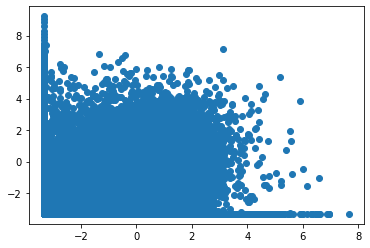

In [612]:
subsample = 1
pseudocount = 0.1
X = np.log2(HEK1_fpkm[::subsample] + pseudocount)
Y = np.log2(GBO_fpkm[::subsample] + pseudocount)
plt.scatter(X,Y)
thrs = np.arange(-2,15)

t_min = min(min(X),min(Y))
t_max = max(max(X),max(Y))
filt = np.logical_and(X>=t_min,X<=t_max)
print (t_min, t_max, sum(filt), spearmanr(X[filt],Y[filt])
          )

_ = []
for t_min,t_max in zip(thrs[:-1],thrs[1:]):
    filt = np.logical_and(X>=t_min,X<=t_max)
    print (t_min, t_max, sum(filt), spearmanr(X[filt],Y[filt])
          )
    _.append(spearmanr(X[filt],Y[filt])[0])

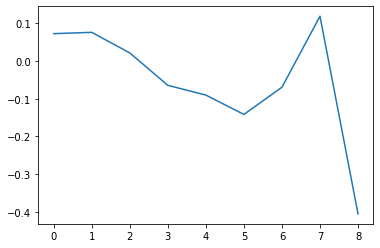

In [613]:
plt.plot(np.arange(len(_)),_)

In [283]:
_ = metadata_full.drop(columns="full_cell_type_description").apply(lambda x: " ".join([str(i[0])+":"+str(i[1]) for i in x.items() if not pd.isna(i[1])]), axis="columns")
_.iloc[0]

'sample_name:ssuv1 protocol:cDNA organism:Homo sapiens read_type:SINGLE data_source:SRA srr:SRR5935010 srx:SRX3095070 sample_title:SSUV1 sample_geo_accession:GSM2742745 sample_status:Public on Oct 01 2017 sample_submission_date:Aug 15 2017 sample_last_update_date:May 15 2019 sample_type:SRA sample_channel_count:1 sample_source_name_ch1:HaCaT cells sample_organism_ch1:Homo sapiens sample_taxid_ch1:9606 sample_molecule_ch1:total RNA sample_description:SSUV1 sample_platform_id:GPL16791 sample_contact_name:Hong,,Sun sample_contact_laboratory:Sun Lab sample_contact_department:Medicine sample_contact_institute:NYU School of Medicine sample_contact_address:341 East 25 Street sample_contact_city:New York sample_contact_state:NY sample_contact_zip_postal_code:10010 sample_contact_country:USA sample_instrument_model:Illumina HiSeq 2500 sample_library_selection:cDNA sample_library_source:transcriptomic sample_library_strategy:RNA-Seq gsm_id:GSM2742745 sample_supplementary_file_1:NONE sample_serie

In [291]:
str(_.iloc[800])[:-10]

'sample_name:d9m1_g01 protocol:cDNA organism:Homo sapiens read_type:SINGLE data_source:SRA srr:SRR8307907 srx:SRX5122408 sample_title:D9M1_G01 sample_geo_accession:GSM3505464 sample_status:Public on Jun 20 2019 sample_submission_date:Dec 07 2018 sample_last_update_date:Jun 20 2019 sample_type:SRA sample_channel_count:1 sample_source_name_ch1:Cardiac fibroblasts sample_organism_ch1:Homo sapiens sample_taxid_ch1:9606 sample_molecule_ch1:polyA RNA sample_platform_id:GPL16791 sample_contact_name:Ziqing,,Liu sample_contact_laboratory:Victoria Bautch sample_contact_department:Biology sample_contact_institute:UNC-Chapel Hill sample_contact_address:416 Fordham Hall, University of North Carolina sample_contact_city:Chapel Hill sample_contact_state:NC sample_contact_zip_postal_code:27514 sample_contact_country:USA sample_instrument_model:Illumina HiSeq 2500 sample_library_selection:cDNA sample_library_source:transcriptomic sample_library_strategy:RNA-Seq gsm_id:GSM3505464 sample_supplementary_fi